#### House price prediction - 2023 - todo: column transformer, pipeline, dump model etc

In [68]:
import numpy as np
import pandas as pd

In [69]:
df = pd.read_csv('housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### try and understand data

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [71]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Can see above that area's scale is way diff than other numerical vars, so we will be performing <b>scaling</b> later

#### pair plot to understand data and see what kind of model can be used

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

pair plot for all numerical variables

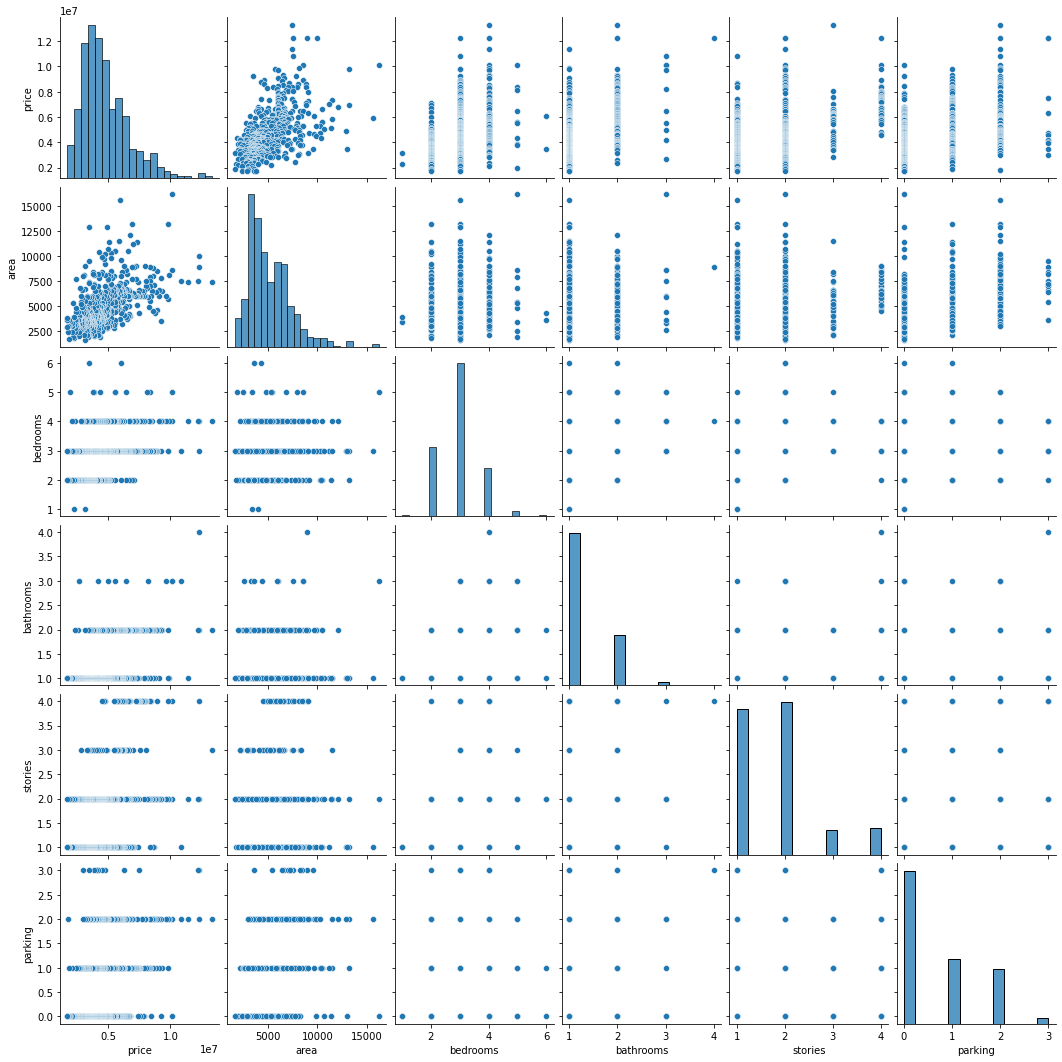

In [73]:
sns.pairplot(df)

Can see some <b>linear relationship</b> between price and area - will go with linear regression as first model arch

Analyze categorical variables

In [74]:
df.select_dtypes(include='object').columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

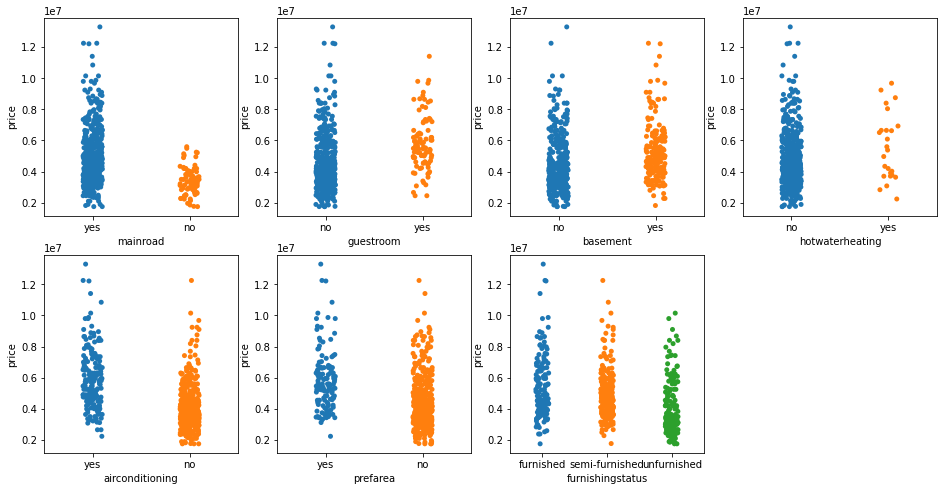

In [75]:
plt.figure(figsize=(16, 8))
plt.subplot(2,4,1)
sns.stripplot(data=df, x="mainroad", y="price")
plt.subplot(2,4,2)
sns.stripplot(data=df, x="guestroom", y="price")
plt.subplot(2,4,3)
sns.stripplot(data=df, x="basement", y="price")
plt.subplot(2,4,4)
sns.stripplot(data=df, x="hotwaterheating", y="price")
plt.subplot(2,4,5)
sns.stripplot(data=df, x="airconditioning", y="price")
plt.subplot(2,4,6)
sns.stripplot(data=df, x="prefarea", y="price")
plt.subplot(2,4,7)
sns.stripplot(data=df, x="furnishingstatus", y="price")

a/c and prefarea seems like having clear impact on price 

#### prepare data

In [76]:
#just to re-run for ease while developing
df = pd.read_csv('housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [77]:
# categorical variables to dummy
def binary_map(x):
    return x.map({'yes':1, 'no':0})

cat_vars=df.select_dtypes(include='object').columns.tolist()
cat_vars.remove('furnishingstatus')
df[cat_vars]=df[cat_vars].apply(binary_map)
df[cat_vars].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [78]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [79]:
#handle furnishing status using dummies
fur_dummies = pd.get_dummies(df['furnishingstatus'], drop_first=True)
fur_dummies.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [80]:
housing = pd.concat([df, fur_dummies], axis=1)
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### train test split

In [81]:
from sklearn.model_selection import train_test_split
housing_train, housing_test = train_test_split(housing, train_size=0.7, random_state=42)

#### scale train dataset as area is on a very high scale comparison to other features and scaling would make - <br/>1. model interpretable, and <br/> 2. can result in quicker gradient descnet

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [83]:
int_var = df.select_dtypes(include='int64').columns.tolist()
int_var

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea']

In [84]:
housing_train[int_var] = scaler.fit_transform(housing_train[int_var])
housing_train[int_var].head()

C:\Users\fairn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\fairn\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
126,0.393333,0.378694,0.4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
363,0.186667,0.132921,0.2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0
370,0.180000,0.180756,0.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
31,0.633333,0.367698,0.4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
113,0.412667,0.547766,0.4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,1.0


#### df to X and y

In [85]:
y_train = housing_train.pop('price')
X_train = housing_train

### MODEL BUILDING

#### Automatic feature selection first using RFE

In [86]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [87]:
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe=RFE(lm, n_features_to_select=10)#top 10 features
rfe=rfe.fit(X_train, y_train)

In [88]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False])

In [89]:
rfe.ranking_

array([1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 2])

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', False, 3),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [95]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea
126,0.378694,0.4,0.0,0.0,1.0,1.0,0.0,0.0,0.666667,1.0
363,0.132921,0.2,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,0.0
370,0.180756,0.2,0.0,0.0,1.0,0.0,0.0,1.0,0.666667,0.0
31,0.367698,0.4,0.0,1.0,1.0,0.0,0.0,1.0,0.666667,0.0
113,0.547766,0.4,0.0,0.0,1.0,1.0,0.0,0.0,0.666667,1.0


#### model 2 with rfe selected features only

In [97]:
lm=LinearRegression()
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict()
lm

In [98]:
from sklearn.metrics import r2_score